In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import pickle
%matplotlib inline

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

<AxesSubplot:>

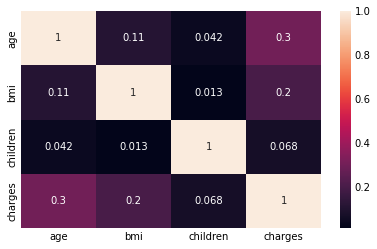

In [4]:
sns.heatmap(df.corr(), annot=True)

> ### We see there are not much correlation among the features

In [5]:
df.corr()['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'charges'}>]], dtype=object)

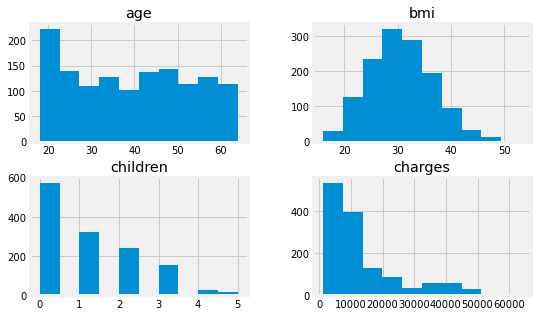

In [6]:
df.hist(figsize = (8,5))

In [7]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


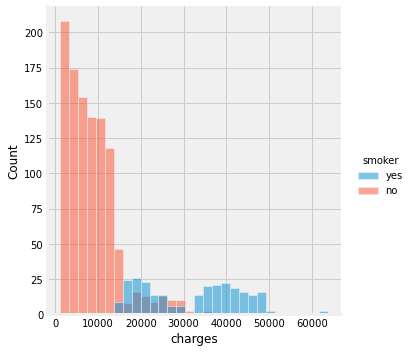

In [8]:
sns.displot(x = 'charges', data=df, hue = 'smoker')

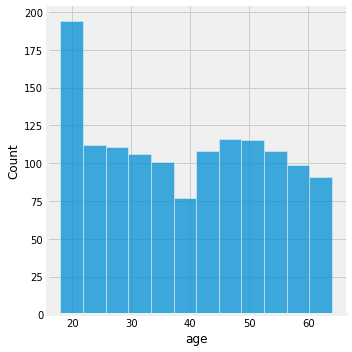

In [9]:
sns.displot(x = 'age', data=df)

### Counts in different catagories

Text(0.5, 1.0, 'Region counts')

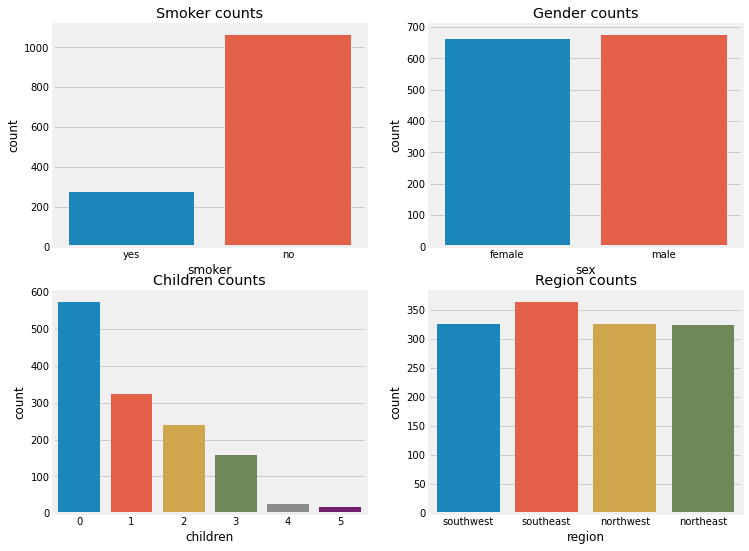

In [10]:
plt.figure(figsize = (11,9))
plt.subplot(2,2,1)
sns.countplot(x='smoker', data = df)
plt.title('Smoker counts')
plt.subplot(2,2,2)
sns.countplot(x='sex',  data = df)
plt.title('Gender counts')
plt.subplot(2,2,3)
sns.countplot(x='children', data = df)
plt.title('Children counts')
plt.subplot(2,2,4)
sns.countplot(x='region',  data = df)
plt.title('Region counts')

#### Observations
* Number of somkers is almost 1/5th of the number of non-smokers
* Sex and Region counts are uniform
* Customer having no children is the most, whereas there are hardly few customers with 4 or 5 children

Text(0.5, 1.0, 'Charges w.r.t Regions')

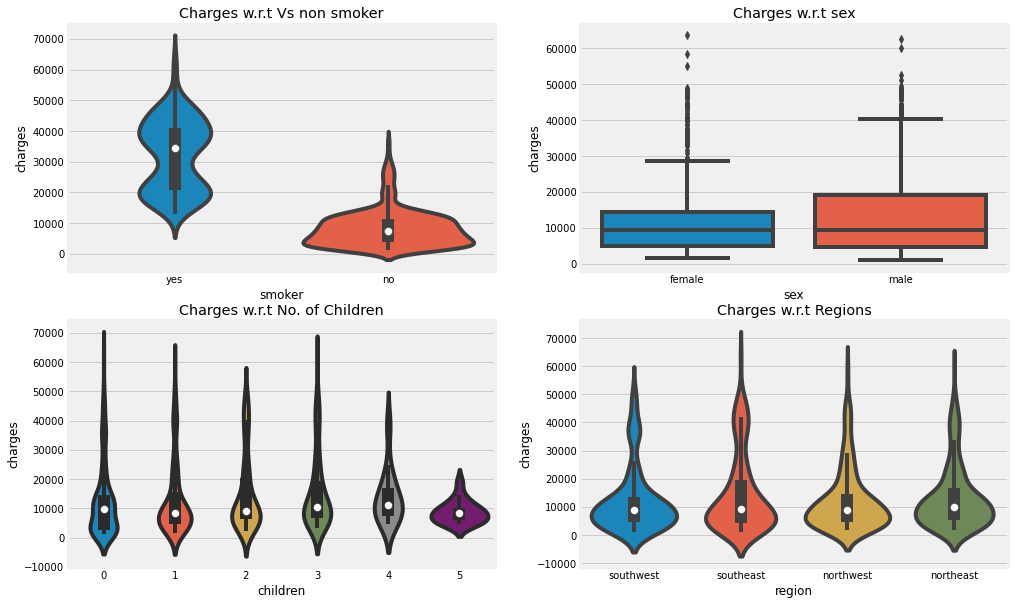

In [11]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
sns.violinplot(x='smoker', y='charges', data = df)
plt.title('Charges w.r.t Vs non smoker')
plt.subplot(2,2,2)
sns.boxplot(x='sex', y='charges', data = df)
plt.title('Charges w.r.t sex')
plt.subplot(2,2,3)
sns.violinplot(x='children', y='charges', data = df, split=True)
plt.title('Charges w.r.t No. of Children')
plt.subplot(2,2,4)
sns.violinplot(x='region', y='charges',  data = df)
plt.title('Charges w.r.t Regions')

#### Observations
* It's clear that smoker has to pay a lot as compared to non smoker
* Charges are roughly the same for male and female
* Charges also doesn't vary with number of children, and with regions

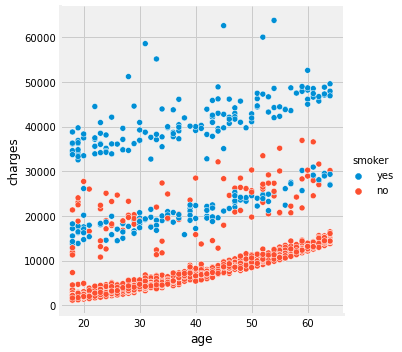

In [12]:
sns.relplot(data=df, x="age", y="charges", hue='smoker')

#### Observations
* Clearly, premium incraeses with age
* Also, it looks like there are three different kinds of insurance plan, as there are three diff price at any particular age 

### Handling Catagorical values

In [13]:
dummies = pd.get_dummies(df[['sex', 'smoker', 'region']], drop_first=True)
dummies.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0


In [14]:
df_with_dummies = pd.concat([df, dummies], axis = 1)
df_with_dummies.head()

,age,sex,bmi,children,smoker,region,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0,0,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0,0,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1,0,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1,0,0


In [15]:
#Removing the original catagorical features as we dont need them anymore
df_cleaned = df_with_dummies.drop(labels=['sex', 'smoker', 'region'], axis = 1)
df_cleaned.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [16]:
df_cleaned.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

### Scaling the data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df_cleaned.drop('charges', axis = 1))
y = df_cleaned.charges

In [18]:
# Saving the scalar object for deployment
pickle.dump(scaler, open('scaler.pkl', 'wb'))

## Visualizing the data by converting them into 2d using PCA

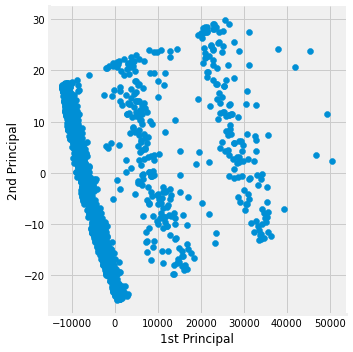

In [19]:
from sklearn.decomposition import PCA
pca_transformed_data = PCA(n_components=2).fit_transform(df_cleaned)
pca_transformed_df = pd.DataFrame(pca_transformed_data, columns=['1st Principal', '2nd Principal'])
sns.FacetGrid(pca_transformed_df, height = 5).map(plt.scatter, '1st Principal', '2nd Principal')

####  Again, PCA is also trying to tell us the same thing that there are three differnet types of insurance products, which can be clustered

## Building a simple Linear regression model

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1070, 8), (268, 8), (1070,), (268,))

In [21]:
lin_reg = LinearRegression()
cv = 5
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_reg_pred = lin_reg.predict(x_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_pred))
print(f'Linear Regression RMSE: {lin_reg_rmse}')

Linear Regression RMSE: 5641.626558850189


## Plotting the learning curve

In [22]:
from sklearn.metrics import mean_squared_error
def plot_learning_curve(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    train_error, test_error = [], []
    for train_size in range(2,len(x_train),50):        
        #print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
        model.fit(x_train[:train_size], y_train[:train_size])
        y_pred_train = model.predict(x_train[:train_size])
        y_pred_test = model.predict(x_test)
        train_error.append(mean_squared_error(y_train[:train_size], y_pred_train))
        #print(train_error)
        test_error.append(mean_squared_error(y_test, y_pred_test))
        #print(test_error)
    plt.plot(np.sqrt(train_error), 'r-', label = 'train_error')
    plt.plot(np.sqrt(test_error), 'b-', label = 'cross_validation_error')
    plt.title("Learning Curve")
    plt.xlabel("Size of training set")
    plt.ylabel("RMSE")
    plt.grid()
    plt.legend()
    #plt.show()
    #plt.axis([0,100,0,1.5])

### Ridge and Lasso

In [23]:
from sklearn.linear_model import Lasso, Ridge
lasso = Lasso()
ridge = Ridge()
lasso.fit(x_train, y_train)
lasso_pred = lasso.predict(x_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))

ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))

In [24]:
print(f'Lasso RMSE: {lasso_rmse}')
print(f'Ridge RMSE: {ridge_rmse}')

Lasso RMSE: 5642.017486267984
Ridge RMSE: 5642.620485761697


In [25]:
#from yellowbrick.model_selection import learning_curve
#print(learning_curve(LinearRegression(), x, y, scoring='r2', cv=5))

### Xgboost

In [26]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

### Decision tree

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange(1,6), 'min_samples_leaf':np.arange(5,10)}
gcv = GridSearchCV(estimator= DecisionTreeRegressor(), param_grid = parameters, scoring='neg_mean_squared_error', cv = 5)
gcv.fit(x_train, y_train)
gcv.best_estimator_

DecisionTreeRegressor(max_depth=4, min_samples_leaf=7)

In [28]:
dt = gcv.best_estimator_
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print(dt_rmse)

4157.192945193825


In [29]:
for f,i in enumerate(dt.feature_importances_):
    print(f'Feature: {f}, Importance: {i}')

Feature: 0, Importance: 0.12115366414199284
Feature: 1, Importance: 0.17187052405049805
Feature: 2, Importance: 0.0011926351332238927
Feature: 3, Importance: 0.0
Feature: 4, Importance: 0.7052220376243981
Feature: 5, Importance: 0.0
Feature: 6, Importance: 0.0005611390498872768
Feature: 7, Importance: 0.0


Text(0, 0.5, 'Predicted values')

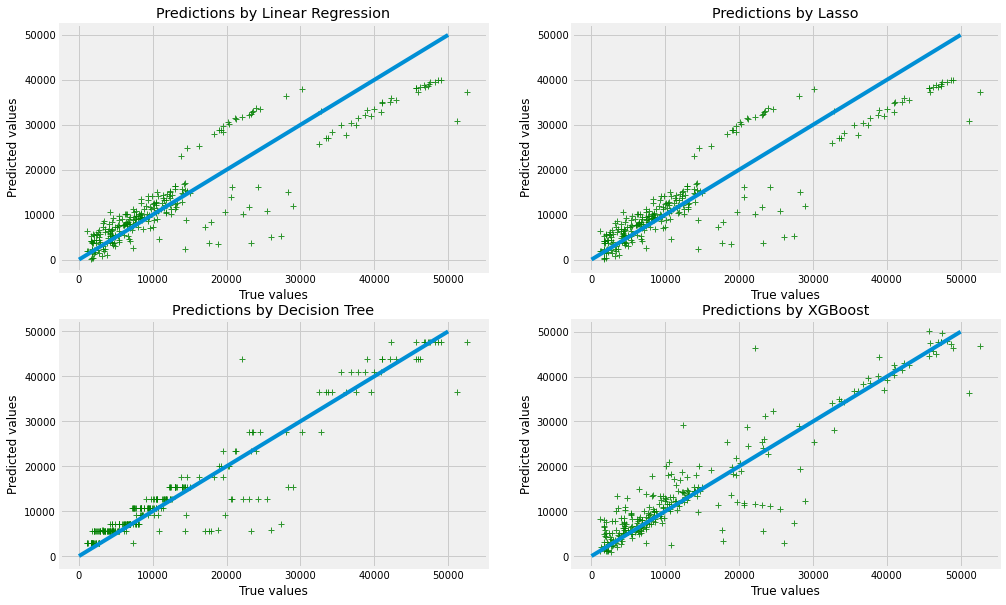

In [30]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plt.plot(y_test, lin_reg_pred, 'g+', alpha = 0.8)
plt.plot(np.arange(50000), np.arange(50000))
plt.title('Predictions by Linear Regression')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.subplot(2,2,2)
plt.plot(y_test, lasso_pred, 'g+', alpha = 0.8)
plt.plot(np.arange(50000), np.arange(50000))
plt.title('Predictions by Lasso')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.subplot(2,2,3)
plt.plot(y_test, dt_pred, 'g+', alpha = 0.8)
plt.plot(np.arange(50000), np.arange(50000))
plt.title('Predictions by Decision Tree')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.subplot(2,2,4)
plt.plot(y_test, xgb_pred, 'g+', alpha = 0.8)
plt.plot(np.arange(50000), np.arange(50000))
plt.title('Predictions by XGBoost')
plt.xlabel('True values')
plt.ylabel('Predicted values')

Text(0.5, 1.0, 'Learning curve: XGBoost')

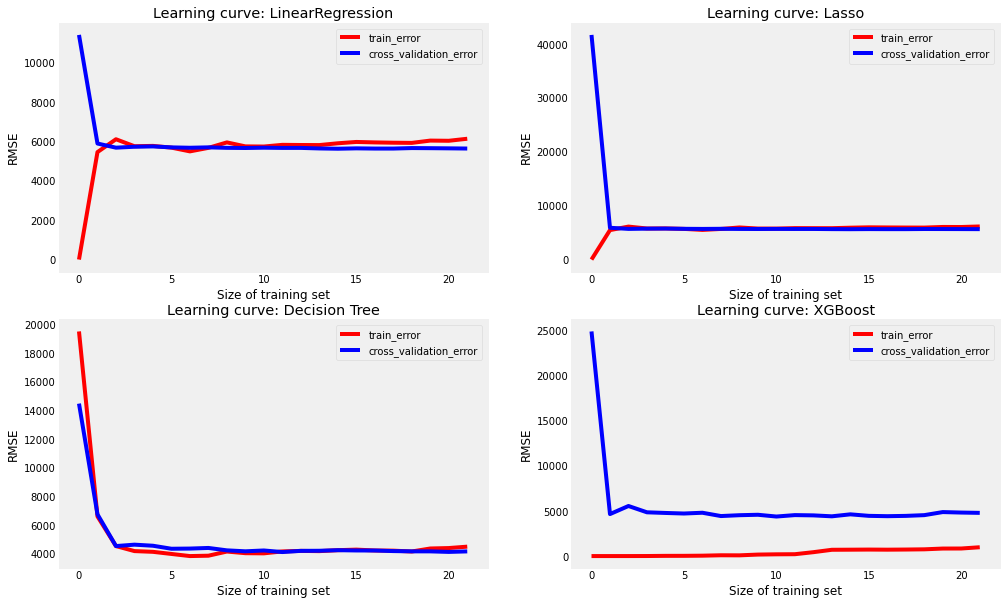

In [31]:
plt.figure(figsize = (15,10))
plt.subplot(2,2,1)
plot_learning_curve(lin_reg, x, y)
plt.title("Learning curve: LinearRegression")
plt.subplot(2,2,2)
plot_learning_curve(lasso, x, y)
plt.title("Learning curve: Lasso")
plt.subplot(2,2,3)
plot_learning_curve(gcv.best_estimator_, x, y)
plt.title("Learning curve: Decision Tree")
plt.subplot(2,2,4)
plot_learning_curve(xgb, x, y)
plt.title("Learning curve: XGBoost")

Text(0.5, 1.0, 'Feature Importance')

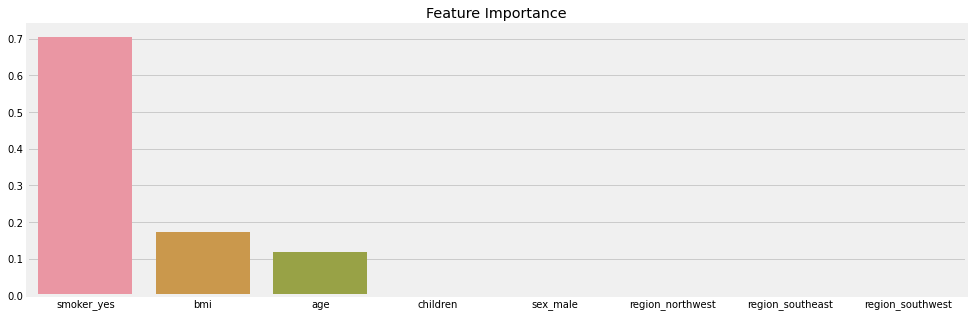

In [32]:
input_features = df_cleaned.drop('charges', axis = 1).columns
f_imp = pd.Series(np.round(dt.feature_importances_, 4), index=input_features)
f_imp.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15,5))
sns.barplot(x = f_imp.index, y = f_imp.values)
plt.title('Feature Importance')

#### As we can see, only three features are playing the important rule namely, smoker, age, bmi, It's logical to try building a model only using these three features instead of all the features

In [33]:
df_truncated = df_cleaned.drop(labels=['children', 'charges', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest'],
                              axis = 1)
df_truncated.head()

,age,bmi,smoker_yes
0,19,27.900,1
1,18,33.770,0
2,28,33.000,0
3,33,22.705,0
4,32,28.880,0


In [34]:
x = df_truncated
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=8)
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
print(dt_rmse)

4212.788014943656


#### Reducing features didn't help much, as we can see we are still getting the same result

In [ ]:
#dot_data = export_graphviz(gcv.best_estimator_, 
#                           feature_names= df_cleaned.drop(labels=['children', 'charges', 'sex_male', 'region_northwest', 'region_southeast', 'region_southwest'],
#                              axis = 1).columns,
#                           out_file=None, filled=True, rounded=True) 
#graph = graphviz.Source(dot_data)
#graph.render("insurance1_dot") 
#graph

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestRegressor
x = df_cleaned.drop('charges', axis = 1)
y = df_cleaned.charges
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)
rf = RandomForestRegressor(n_estimators=500) #Default settings
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
print(rf_rmse)

4339.963485905583


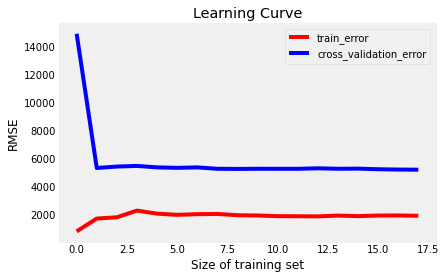

In [36]:
plot_learning_curve(rf, x_train, y_train)

#### Looks like overfitted

Wall time: 59.9 s
RandomForestRegressor(max_features=5, max_samples=0.4, n_estimators=1000)
Test Score : 3968.618774929815


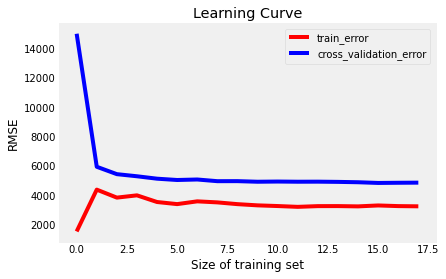

In [38]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1000], 'max_samples':[0.4,0.5], 'max_features':[2,3,4,5]}
gcv = GridSearchCV(estimator= RandomForestRegressor(), param_grid = parameters, scoring='neg_mean_squared_error', cv = 3)
%time gcv.fit(x_train, y_train)
rf_rmse = np.sqrt(-gcv.score(x_test, y_test))
print(gcv.best_estimator_)
print(f'Test Score : {rf_rmse}')
rf = gcv.best_estimator_
plot_learning_curve(rf, x_train, y_train)

#### Even though lesser than the above model, this model also overfits the data

Wall time: 1min 6s
RandomForestRegressor(max_features=5, max_samples=0.5, min_samples_leaf=5,
                      n_estimators=120)
Test Score : 3992.931876989077


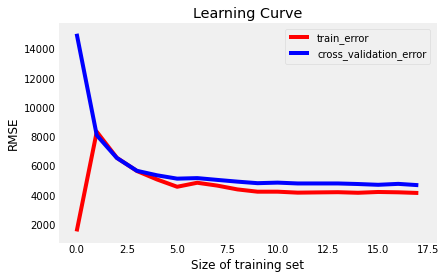

In [37]:
from sklearn.model_selection import GridSearchCV 
rf = RandomForestRegressor(n_estimators = 120)
parameters = {'max_samples':[0.4,0.5], 'max_features':[2,3,4,5], 'min_samples_leaf':np.arange(5,16)}
gcv = GridSearchCV(estimator= rf, param_grid = parameters, scoring='neg_mean_squared_error', cv = 3)
%time gcv.fit(x_train, y_train)
rf_rmse = np.sqrt(-gcv.score(x_test, y_test))
print(gcv.best_estimator_)
print(f'Test Score : {rf_rmse}')
rf = gcv.best_estimator_
plot_learning_curve(rf, x_train, y_train)


#### >  Trying to incrase the minimum number of samples per leaf in order to reduce the chances of overfitting.
#### >  Even though the score remains more or less the same as above model, but this one has the higher chance of generalizing better

In [39]:
## don't run below cells, this will overwrite the saved models

In [ ]:
import pickle
xgb_model = pickle.dump(xgb, open('xgb_model.pkl', 'wb'))

In [ ]:
x_test[:4]

In [ ]:
xgb.predict(x_test[:1])

In [ ]:
model = pickle.load(open('xgb_model.pkl', 'rb'))
s = pickle.load(open('scaler.pkl', 'rb'))

In [ ]:
s.mean_

In [ ]:
s.var_

In [40]:
# testing the model for one sample

Age = 58
Gender = 'male' 
BMI = 32
Children = 1
Smoker = 'no'
Region = 'southeast'

model = pickle.load(open('xgb_model.pkl', 'rb'))
s = pickle.load(open('scaler.pkl', 'rb'))


x_query = [[Age, Gender, BMI, Children, Smoker, Region]] 
print("Query point : ", x_query)
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
df = pd.DataFrame(x_query, columns=features)
print(df)


#Adding the OHE features
if Gender == 'male':
    df['sex_male'] = 1
else:
    df['sex_male'] = 0

if Smoker == 'yes':
    df['smoker_yes'] = 1
else:
    df['smoker_yes'] = 0

if Region == 'northwest':
    df['region_northwest'] = 1
    df['region_southeast'] = 0
    df['region_southwest'] = 0
elif Region == 'southeast':
    df['region_northwest'] = 0
    df['region_southeast'] = 1
    df['region_southwest'] = 0
elif Region == 'southwest':
    df['region_northwest'] = 0
    df['region_southeast'] = 0
    df['region_southwest'] = 1
else:
    df['region_northwest'] = 0
    df['region_southeast'] = 0
    df['region_southwest'] = 0


#extra_features = ['sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']

df_prepared = df.drop(labels=[ 'sex', 'smoker', 'region'], axis = 1)
print("DF Prepared: \n",df_prepared)
x_test = s.transform(df_prepared)
print("x_test\n", x_test)
y_pred = model.predict(x_test)

print("Cost will be around Rs. ", y_pred[0])

Query point :  [[58, 'male', 32, 1, 'no', 'southeast']]
   age   sex  bmi  children smoker     region
0   58  male   32         1     no  southeast
DF Prepared: 
    age  bmi  children  sex_male  smoker_yes  region_northwest  \
0   58   32         1         1           0                 0   

   region_southeast  region_southwest  
0                 1                 0  
x_test
 [[ 1.33808216  0.21926237 -0.07876719  0.98959079 -0.5074631  -0.56641788
   1.63579466 -0.56641788]]


AttributeError: 'XGBModel' object has no attribute 'enable_categorical'

In [ ]:
xgb.predict(x_test)

In [ ]:
s.transform(df_prepared)

In [ ]:
means = s.mean_
means

In [ ]:
std = np.sqrt(s.var_)
std

In [ ]:
s.var_